#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Importing dataset 

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Data doesn't contain any null values

#### Visualization of data

In [6]:
TV=df['TV']
radio=df['radio']
NP=df['newspaper']
sales=df['sales']

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

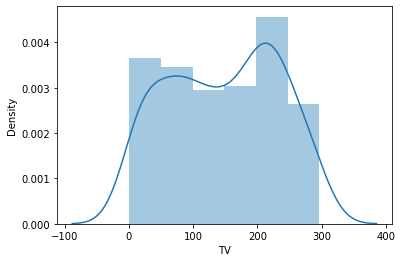

In [7]:
sns.distplot(TV)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

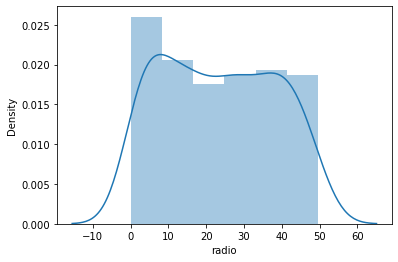

In [8]:
sns.distplot(radio)

###### Distribution for TV and radio seem like uniform distributions.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

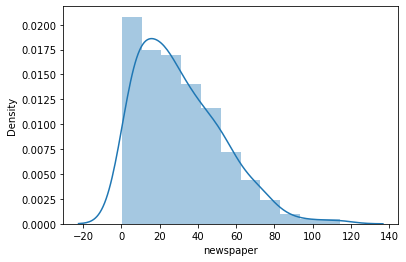

In [9]:
sns.distplot(NP)

###### Newspaper distribution is right skewed

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

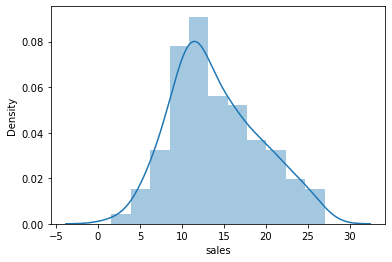

In [10]:
sns.distplot(sales)

###### The output/sales distribution almost follows a normal distribution.

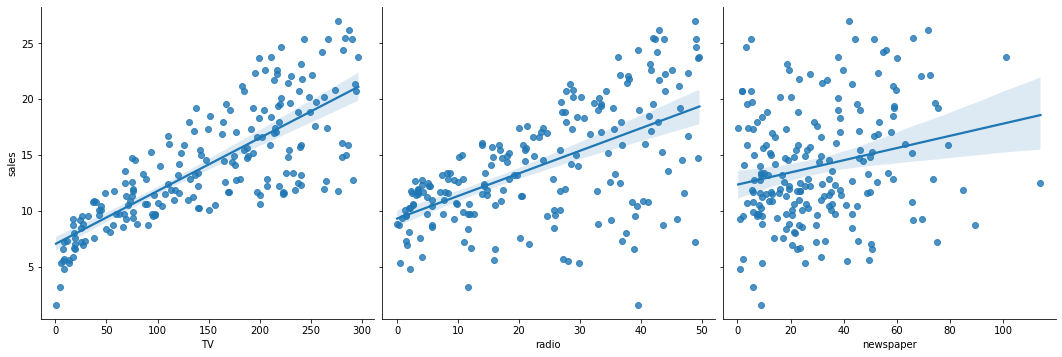

In [11]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars=['sales'],height=5,aspect=1,kind='reg')

The TV and sales show a very strong relationship through this linear regression model. whereas, somewhat, weaker relationship is assumed between radio and sales and newspaper and sales have the weakest relationship

In [12]:
df.TV.corr(df.sales)

0.7822244248616061

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


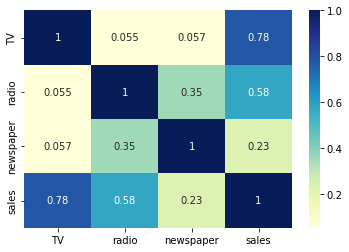

In [13]:
print(df.corr())
dataplot=sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()


Correlation between TV advertisements and sales seems most strong.

##### Model Training:

In [14]:
col=['TV','radio','newspaper']
X=df[col]

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
X.shape

(200, 3)

In [17]:
y=df['sales']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

###### Check for test and train data

In [20]:
x_train.head()

,TV,radio,newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [21]:
y_train.head()

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
Name: sales, dtype: float64

In [22]:
x_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [23]:
y_test.head()

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64

In [24]:
x_train.shape

(140, 3)

In [25]:
y_train.shape

(140,)

In [26]:
x_test.shape

(60, 3)

In [27]:
y_test.shape

(60,)

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

##### Model Interpretation:

In [30]:
print("Model intercept Bo is:",model.intercept_)

Model intercept Bo is: 2.9372157346906107


In [31]:
print("Model Coefficients B1,B2,B3 are : ",model.coef_)

Model Coefficients B1,B2,B3 are :  [0.04695205 0.17658644 0.00185115]


##### Predictions with the model:

In [32]:
y_pred=model.predict(x_test)

In [33]:
print("predicted values from test dataset : \n ",y_pred)

predicted values from test dataset : 
  [21.66318307 16.44137936  7.69144625 17.9163172  18.67047113 23.79199311
 16.2825425  13.44138683  9.15294033 17.32475313 14.43922876  9.84019547
 17.26329945 16.62853147 15.09158705 15.50173894 12.43404074 17.32591521
 11.04327486 18.05652777  9.35309526 12.79465958  8.73413846 10.47225333
 11.38216042 15.02658554  9.7406823  19.44676903 18.19211174 17.20178728
 21.56359539 14.70484262 16.2635213  12.37098906 19.97059316 15.36768988
 14.00399515 10.0772945  20.91891557  7.43833283  3.67031166  7.27760354
  5.99523188 18.41497546  8.31868226 14.1090252  14.93697583 20.35882814
 20.56271636 19.55380813 24.10360923 14.84985778  6.71474914 19.77761567
 18.93996367 12.5109195  14.20052652  6.10844697 15.3695344   9.56769111]


##### ACCURACY AND CROSS-VALIDATION WITH MODEL:

In [34]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
    model.fit(x_train,y_train)
    print("ACCURACY IS", model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5) #cv=5, Number of slits=5
    print("CROSS VALIDATION",np.mean(score)*100)

In [35]:
classify(model,X,y)

ACCURACY IS 86.09466508230368
CROSS VALIDATION 88.71063495438435


#### MODEL EVALUATION METRICS:

In [36]:
from sklearn import metrics

##### 1. Mean square Error

In [37]:
print(metrics.mean_squared_error(y_test,y_pred))

1.9289249074665735


##### 2. Mean Absolute Error

In [38]:
print(metrics.mean_absolute_error(y_test,y_pred))

1.054832840507332


##### 3. Root Mean Squared Error

In [39]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3888574107756972


### THE MODEL ACCURACY COMES OUT TO BE 86.09%, WITH CROSS VALIDATION CLOSE TO 89 , MAE=1.054 ,MSE= 1.928 AND RMSE=1.388